In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.model_selection import GridSearchCV

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo Data Science/PandasForDataManipulation/Starbucks Survey.csv'
data = pd.read_csv(filename)
data.head()

,Gender,Age,Status,Income,Visit,Mode of Visitation,Time spent in Store,Membership Card,Purchase,Purchase Cost,Product Quality,Price Range,Importantce of Sales/Promotions,Ambiance,WiFi Quality,Service,Promo Method,Will you Come Back?
0,Female,From 20 to 29,Student,"Less than $25,000",Rarely,Dine in,Below 30 minutes,No,Coffee,Less than $10,3,2,4,4,3,4,Website/Apps,No
1,Female,From 20 to 29,Student,"Less than $25,000",Rarely,Dine in,Below 30 minutes,No,Coffee,Less than $10,4,3,2,4,3,4,Word of Month,No
2,Male,From 20 to 29,Student,"Less than $25,000",Rarely,Dine in,Below 30 minutes,No,Coffee,Less than $10,3,2,4,3,3,3,Social Media,No
3,Male,From 20 to 29,Student,"Less than $25,000",Rarely,Dine in,Below 30 minutes,No,Cold drinks,Less than $10,3,3,3,3,3,3,Social Media,No
4,Female,Below 20,Student,"Less than $25,000",Rarely,Dine in,Below 30 minutes,No,Cold drinks,Less than $10,3,3,2,2,2,4,Social Media,No


In [4]:
data.shape

(1068, 18)

Data Processing

Any NULL values?

In [5]:
data.isnull().sum()

Gender                             0
Age                                0
Status                             0
Income                             0
Visit                              0
Mode of Visitation                 0
Time spent in Store                0
Membership Card                    0
Purchase                           0
Purchase Cost                      0
Product Quality                    0
Price Range                        0
Importantce of Sales/Promotions    0
Ambiance                           0
WiFi Quality                       0
Service                            0
Promo Method                       0
Will you Come Back?                0
dtype: int64

In [6]:
data.dtypes

Gender                             object
Age                                object
Status                             object
Income                             object
Visit                              object
Mode of Visitation                 object
Time spent in Store                object
Membership Card                    object
Purchase                           object
Purchase Cost                      object
Product Quality                     int64
Price Range                         int64
Importantce of Sales/Promotions     int64
Ambiance                            int64
WiFi Quality                        int64
Service                             int64
Promo Method                       object
Will you Come Back?                object
dtype: object

Investigate all the elements of each Feature(column)

In [7]:
for column in data:
  unique_vals = np.unique(data[column])
  nr_values = len(unique_vals)
  if nr_values < 10:
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
  else:
      print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :4 -- ['40 and above' 'Below 20' 'From 20 to 29' 'From 30 to 39']
The number of values for feature Status :4 -- ['Employed' 'Housewife' 'Self-employed' 'Student']
The number of values for feature Income :5 -- ['$100,000 - $150,000' '$25,000 - $50,000' '$50,000 - $100,000'
 'Less than $25,000' 'More than $150,000']
The number of values for feature Visit :5 -- ['Daily' 'Monthly' 'Never' 'Rarely' 'Weekly']
The number of values for feature Mode of Visitation :3 -- ['Dine in' 'Drive-thru' 'Walk-In']
The number of values for feature Time spent in Store :2 -- ['30 minutes or More' 'Below 30 minutes']
The number of values for feature Membership Card :2 -- ['No' 'Yes']
The number of values for feature Purchase :3 -- ['Coffee' 'Cold drinks' 'Other']
The number of values for feature Purchase Cost :4 -- ['Between $10 - $15' 'Between $15 - $20' 'Less than $10' 'More than $20']
The number of values f

In [8]:
data.columns

Index(['Gender', 'Age', 'Status', 'Income', 'Visit', 'Mode of Visitation',
       'Time spent in Store', 'Membership Card', 'Purchase', 'Purchase Cost',
       'Product Quality', 'Price Range', 'Importantce of Sales/Promotions',
       'Ambiance', 'WiFi Quality', 'Service', 'Promo Method',
       'Will you Come Back?'],
      dtype='object')

Visualizing Data

In [9]:
features = ['Gender', 'Age', 'Status', 'Income', 'Visit', 'Mode of Visitation',
       'Time spent in Store', 'Membership Card', 'Purchase', 'Purchase Cost',
       'Product Quality', 'Price Range', 'Importantce of Sales/Promotions',
       'Ambiance', 'WiFi Quality', 'Service', 'Promo Method',
       'Will you Come Back?']

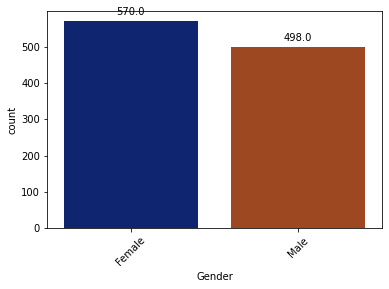

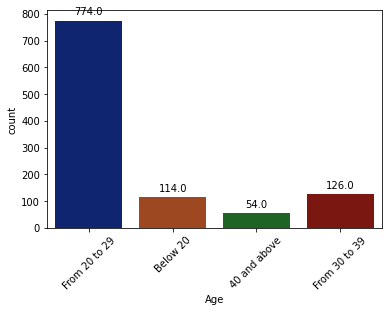

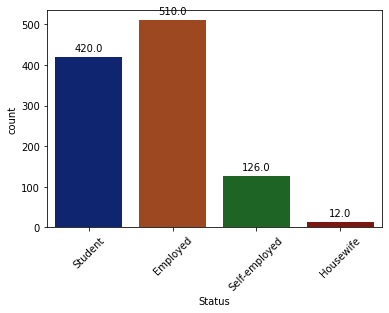

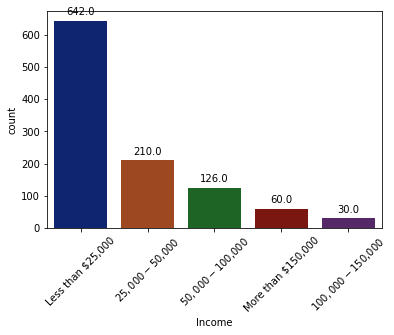

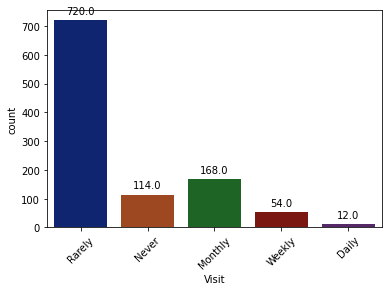

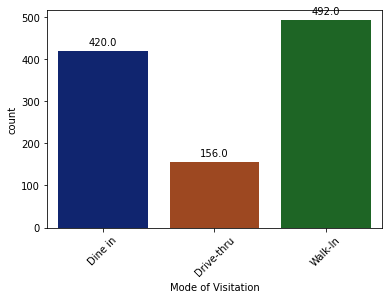

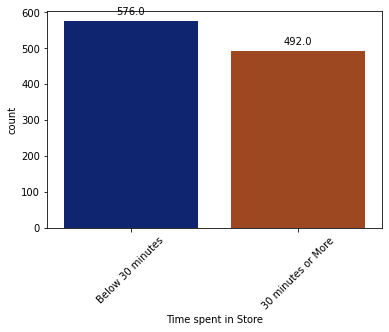

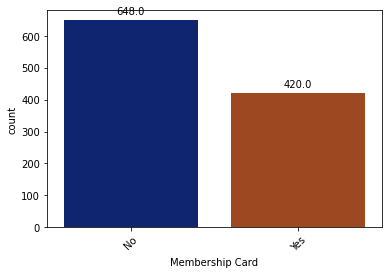

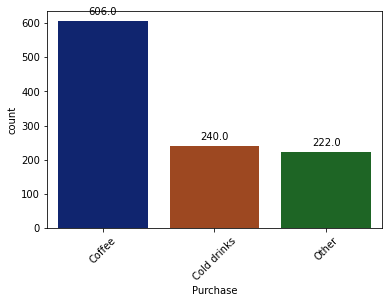

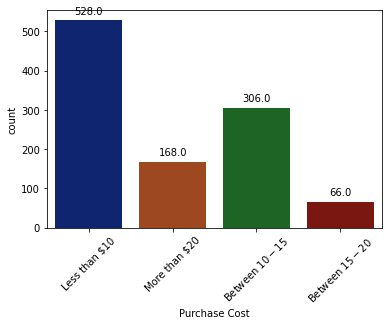

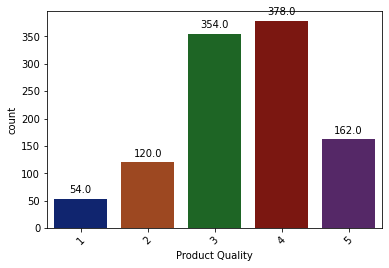

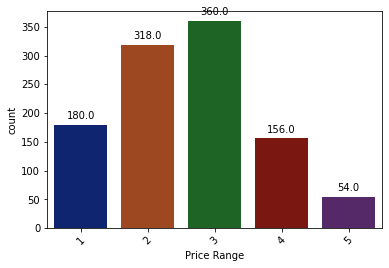

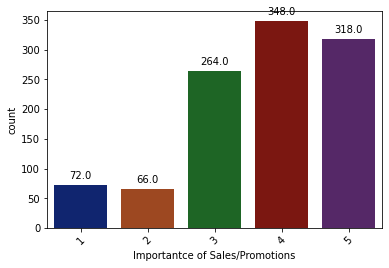

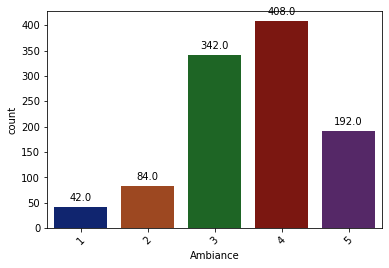

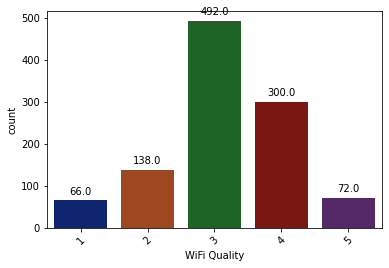

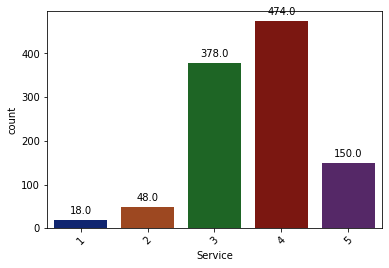

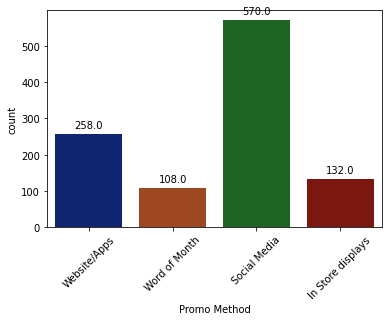

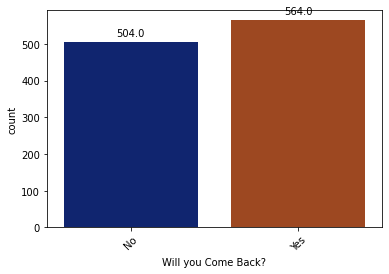

In [10]:
for f in features:
  ax =sns.countplot(x=f, data=data, palette='dark')
  for x in ax.patches:
    ax.annotate(format(x.get_height(), '.1f'), 
                   (x.get_x() + x.get_width() / 2., x.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
  plt.xticks(rotation=45)
  plt.show()

In [11]:
encoder = LabelEncoder()

In [12]:
data.columns

Index(['Gender', 'Age', 'Status', 'Income', 'Visit', 'Mode of Visitation',
       'Time spent in Store', 'Membership Card', 'Purchase', 'Purchase Cost',
       'Product Quality', 'Price Range', 'Importantce of Sales/Promotions',
       'Ambiance', 'WiFi Quality', 'Service', 'Promo Method',
       'Will you Come Back?'],
      dtype='object')

In [13]:
object_columns = ['Gender', 'Age', 'Status', 'Income', 'Visit', 'Mode of Visitation',
       'Time spent in Store', 'Membership Card', 'Purchase', 'Purchase Cost',
       'Product Quality', 'Price Range', 'Importantce of Sales/Promotions',
       'Ambiance', 'WiFi Quality', 'Service', 'Promo Method',
       'Will you Come Back?']

In [14]:
for column in object_columns:
    data[column] = encoder.fit_transform(data[column]) 

In [15]:
data.head()

,Gender,Age,Status,Income,Visit,Mode of Visitation,Time spent in Store,Membership Card,Purchase,Purchase Cost,Product Quality,Price Range,Importantce of Sales/Promotions,Ambiance,WiFi Quality,Service,Promo Method,Will you Come Back?
0,0,2,3,3,3,0,1,0,0,2,2,1,3,3,2,3,2,0
1,0,2,3,3,3,0,1,0,0,2,3,2,1,3,2,3,3,0
2,1,2,3,3,3,0,1,0,0,2,2,1,3,2,2,2,1,0
3,1,2,3,3,3,0,1,0,1,2,2,2,2,2,2,2,1,0
4,0,1,3,3,3,0,1,0,1,2,2,2,1,1,1,3,1,0


In [16]:
data.shape

(1068, 18)

In [17]:
X = data.loc[:,data.columns!='Will you Come Back?'].values

In [18]:
X.shape

(1068, 17)

In [19]:
y = data.loc[:,'Will you Come Back?'].values

In [20]:
y.shape

(1068,)

In [21]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

Chi Square to pick top 10 attributes

In [22]:
X = data.iloc[:,0:16]  #independent columns
y = data.iloc[:,-1]    #target column i.e Will you Visit Again?
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Feature       Score
11      Price Range  221.959523
9     Purchase Cost  165.127121
7   Membership Card  111.855189
10  Product Quality   89.803480
13         Ambiance   50.553429
8          Purchase   31.445529
2            Status   31.172917
14     WiFi Quality   17.409900
15          Service   17.061778
4             Visit    8.776596


In [23]:
feature_names = ['Purchase Cost', 'Price Range', 'Membership Card', 'Product Quality', 'Ambiance', 'Purchase', 'Status', 'WiFi Quality','Service','Visit']
X = data[feature_names]
y = data['Will you Come Back?'].values


Train Test Split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Scaling Data

In [25]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

PCA - Dimensionality Reduction

In [26]:
pca = PCA(random_state=42)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(scaled_df)
reduced = pca.transform(scaled_df)

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.34086805, 0.50566086, 0.62365214, 0.72620378, 0.79148847,
       0.85259361, 0.90458497, 0.94191427, 0.97171   ])

Identifying the "best" n_components

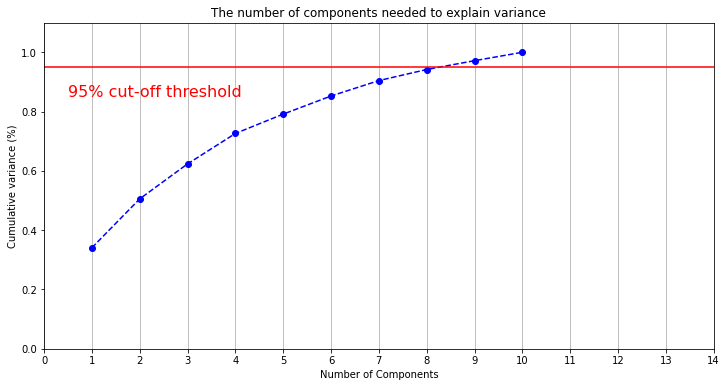

In [29]:
pca = PCA().fit(scaled_df)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 15, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In this case, to get 95% of variance explained I need 8 principal components.

In [30]:
X.shape

(1068, 10)

In [31]:
y.shape

(1068,)

Train Test Split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Scaling Data

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

PCA - Dimensionality Reduction

In [34]:
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [35]:
explained_variance = pca.explained_variance_ratio_

Random Forest Classifier

In [36]:
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
rf_y_pred = rf.predict(X_test)

In [38]:
rf_score = accuracy_score(y_test, rf_y_pred)

In [39]:
print(rf_score)

0.8364485981308412


KNN Classifier

In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
knn_y_pred = knn.predict(X_test)

In [42]:
knn_score = accuracy_score(y_test, knn_y_pred)

In [43]:
print(knn_score)

1.0


Gradient Boosting Classifier

In [44]:
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
gb_y_pred = gb.predict(X_test)

In [46]:
gb_score = accuracy_score(y_test,gb_y_pred)

In [47]:
print(gb_score)

1.0


XG Boost Classifier

In [48]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [49]:
xgb_y_pred = xgb.predict(X_test)

In [50]:
xgb_score = accuracy_score(y_test,xgb_y_pred)

In [51]:
print(xgb_score)

1.0


Logistic Regression Classifier

In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
lr_y_pred = lr.predict(X_test)

In [54]:
lr_score = accuracy_score(y_test,lr_y_pred)

In [55]:
print(lr_score)

0.7710280373831776


In [56]:
print('The RandomForest Classification score is: {:0.2f}%.'.format(rf_score*100))
print('The KNN Classification score is: {:0.2f}%.'.format(knn_score*100))
print('The Gradient Boosting Classification score is: {:0.2f}%.'.format(gb_score*100))
print('The XG Boost Classification score is: {:0.2f}%.'.format(xgb_score*100))
print('The Logistic Regression Classification score is: {:0.2f}%.'.format(lr_score*100))

The RandomForest Classification score is: 83.64%.
The KNN Classification score is: 100.00%.
The Gradient Boosting Classification score is: 100.00%.
The XG Boost Classification score is: 100.00%.
The Logistic Regression Classification score is: 77.10%.


Hyperparameter Tuning

1) Hyperparameter Tuning on Randon Forest

In [57]:
print('Parameters currently in use for Random Forest Model:\n')
pprint(rf.get_params())

Parameters currently in use for Random Forest Model:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [58]:
param_grid = {
    'max_depth': [5, 15, 30, 'None'],
    'max_features': ['log2', 'sqrt', 'auto', 'None'],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [1, 10, 50],
    'n_estimators': [100, 200, 500, 1000]}

In [59]:
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [60]:
rf_best_grid = rf_grid_search.fit(X_train, y_train) 

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 13.1min finished


In [61]:
rf_best_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [62]:
best_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [63]:
best_rf_y_pred = best_rf.predict(X_test)

In [64]:
best_rf_score = accuracy_score(y_test, best_rf_y_pred)

In [65]:
print(best_rf_score)

0.9205607476635514


In [66]:
print('The Random Forest Classification score is: {:0.2f}%.'.format(best_rf_score*100))

The Random Forest Classification score is: 92.06%.


In [67]:
print('Improvement of {:0.2f}%.'.format( 100 * (best_rf_score - rf_score) / rf_score))

Improvement of 10.06%.


2) Hyperparameter Tuning on KNN

In [68]:
print('Parameters currently in use for KNN Model:\n')
pprint(knn.get_params())

Parameters currently in use for KNN Model:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [69]:
param_grid = {
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'n_neighbors': [2, 4, 8, 16]}

In [70]:
knn_grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [71]:
knn_best_grid = knn_grid_search.fit(X_train, y_train) 

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.4s finished


In [72]:
knn_best_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='distance')

In [73]:
best_knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='distance')

In [74]:
best_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='distance')

In [75]:
best_knn_y_pred = best_knn.predict(X_test)

In [76]:
best_knn_score = accuracy_score(y_test, best_knn_y_pred)

In [77]:
print(best_knn_score)

1.0


In [78]:
print('KNN Classification score is: {:0.2f}%.'.format(best_knn_score*100))

KNN Classification score is: 100.00%.


In [79]:
print('Improvement of {:0.2f}%.'.format( 100 * (best_knn_score - knn_score) / knn_score))

Improvement of 0.00%.


3) Hyperparameter Tuning on Logistic Regression

In [80]:
print('Parameters currently in use Logistic Regression Model:\n')
pprint(lr.get_params())

Parameters currently in use Logistic Regression Model:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [81]:
param_grid = [{'penalty':['11','12','elasticnet','none'],
              'C': np.logspace(-4,4,20),
               'class_weight':['dict', 'balanced'],
              'max_iter':[100,1000,2000,5000]}]

In [82]:
lr_grid_search = GridSearchCV(lr, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

In [83]:
lr_best_grid = lr_grid_search.fit(X_train, y_train) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:    3.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [84]:
lr_best_grid.best_estimator_

LogisticRegression(C=0.0001, class_weight='dict', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)

In [85]:
best_lr=LogisticRegression(C=0.0001, class_weight='dict', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)

In [86]:
best_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


LogisticRegression(C=0.0001, class_weight='dict', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)

In [87]:
best_lr_y_pred = best_lr.predict(X_test)

In [88]:
best_lr_score = accuracy_score(y_test, best_lr_y_pred)

In [89]:
print(best_lr_score)

0.7710280373831776


In [90]:
print('The Logistic Regression Classification score is: {:0.2f}%.'.format(best_lr_score*100))

The Logistic Regression Classification score is: 77.10%.


In [91]:
print('Improvement of {:0.2f}%.'.format( 100 * (best_lr_score - lr_score) / lr_score))

Improvement of 0.00%.


4) Hyperparameter Tuning on Gradient Boosting

In [92]:
print('Parameters currently in use Gradient Boosting Model:\n')
pprint(gb.get_params())

Parameters currently in use Gradient Boosting Model:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [93]:
param_grid = {
    'max_depth': [5, 15, 30, 'None'],
    'max_features': ['log2', 'sqrt', 'auto', 'None'],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [1, 10, 50],
    'n_estimators': [100, 200, 500, 1000]}

In [94]:
gb_grid_search = GridSearchCV(gb, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

In [95]:
gb_best_grid = gb_grid_search.fit(X_train, y_train) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 924 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed:  3.5min finished


In [96]:
gb_best_grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [97]:
best_gb=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=30,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [98]:
best_gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=30,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [99]:
best_gb_y_pred = best_gb.predict(X_test)

In [100]:
best_gb_score = accuracy_score(y_test, best_gb_y_pred)

In [101]:
print(best_gb_score)

1.0


In [102]:
print('The Gradient Boosting Classification score is: {:0.2f}%.'.format(best_gb_score*100))

The Gradient Boosting Classification score is: 100.00%.


In [103]:
print('Improvement of {:0.2f}%.'.format( 100 * (best_gb_score - gb_score) / gb_score))

Improvement of 0.00%.


5) Hyperparameter Tuning on XG Boosting Classifier

In [104]:
print('Parameters currently in use XG Boost Model:\n')
pprint(xgb.get_params())

Parameters currently in use XG Boost Model:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


In [105]:
param_grid = {"subsample":[0.5, 0.75, 1],
"colsample_bytree":[0.5, 0.75, 1],
"max_depth":[2, 6, 12],
"min_child_weight":[1,5,15],
"learning_rate":[0.3, 0.1, 0.03],
"n_estimators":[100]}

In [106]:
xgb_grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

In [107]:
xgb_best_grid = xgb_grid_search.fit(X_train, y_train) 

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:   23.5s finished


In [108]:
xgb_best_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [109]:
best_xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)

In [110]:
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)

In [111]:
best_xgb_y_pred = best_xgb.predict(X_test)

In [112]:
best_xgb_score = accuracy_score(y_test, best_xgb_y_pred)

In [113]:
print(best_xgb_score)

0.8738317757009346


In [114]:
print('The XG Boosting Classification score is: {:0.2f}%.'.format(best_xgb_score*100))

The XG Boosting Classification score is: 87.38%.


In [115]:
print('Improvement of {:0.2f}%.'.format( 100 * (best_xgb_score - xgb_score) / xgb_score))

Improvement of -12.62%.


In [116]:
print('The RandomForest Classification score is: {:0.2f}%.'.format(best_rf_score*100))
print('The KNN Classification score is: {:0.2f}%.'.format(best_knn_score*100))
print('The Gradient Boosting Classification score is: {:0.2f}%.'.format(best_gb_score*100))
print('The XG Boost Classification score is: {:0.2f}%.'.format(best_xgb_score*100))
print('The Logistic Regression Classification score is: {:0.2f}%.'.format(best_lr_score*100))

The RandomForest Classification score is: 92.06%.
The KNN Classification score is: 100.00%.
The Gradient Boosting Classification score is: 100.00%.
The XG Boost Classification score is: 87.38%.
The Logistic Regression Classification score is: 77.10%.


Voting Classification on Hyperparameter Tuning Models

In [117]:
vc = VotingClassifier(estimators=[('rf',  best_rf), ('lr',  best_lr), 
                                       ('knn',  best_knn), ('gb', best_gb),('xgb', best_xgb)], 
                           voting ='soft', n_jobs=-1) 

vc.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=5,
                                                     max_features='log2',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=10,
                                                     min_samples_split=50,
                                                     min_weight_fraction_leaf=0.0,
         

In [118]:
print(vc.estimators_)

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False), LogisticRegression(C=0.0001, class_weight='dict', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs

In [119]:
vc_y_pred=vc.predict(X_test)

In [120]:
vc_score = accuracy_score(y_test,vc_y_pred)

In [121]:
print('The Voting Classification score is: {:0.2f}%.'.format(vc_score*100))

The Voting Classification score is: 100.00%.


In [122]:
y_test.shape

(214,)

Performance Measurements

In [123]:
cm1 = confusion_matrix(y_test,vc_y_pred)

In [124]:
cm_df = pd.DataFrame(cm1,
                     index = ['No','Yes'], 
                     columns = ['No','Yes'])

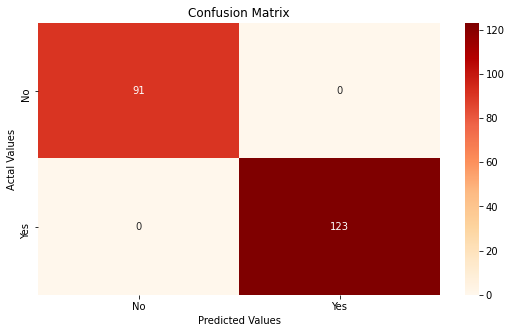

In [125]:
#Plotting the confusion matrix
plt.figure(figsize=(9,5))
sns.heatmap(cm_df, cmap="OrRd",annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Calculating the TP, TN, FP, FN values

In [126]:
cm1 = confusion_matrix(y_test,vc_y_pred)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[ 91   0]
 [  0 123]]


In [127]:
from sklearn import metrics
cm1 = metrics.confusion_matrix(y_test, vc_y_pred).ravel()
cm1

array([ 91,   0,   0, 123])

In [128]:
tn, fp, fn, tp = cm1

In [129]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(f'{accuracy*100:.02f}% Accuarcy')

100.00% Accuarcy


In [130]:
misclassification = 1 - accuracy
print(f'{misclassification*100:.02f}% Misclassification')

0.00% Misclassification


Precision

In [131]:
# Out of all of my prediction to be in the positive class, what % was I actually correct
precision = tp/(tp+fp)
print(f'{precision*100:.02f}% Precision')
print(f'This means that we are "FALSELY PREDICTING" customers will come back to visit {misclassification*100:.02f}% of the time.')

100.00% Precision
This means that we are "FALSELY PREDICTING" customers will come back to visit 0.00% of the time.


In [132]:
print(metrics.classification_report(y_test,vc_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       123

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214

